In [24]:
import pandas as pd
import geopandas as gpd
import os
import osmnx as ox
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
gdf=gpd.read_file('express_orders/express_4756.gpkg')

Cannot find header.dxf (GDAL_DATA is not defined)


In [12]:
for file in os.listdir('C:\\Users\\Евгений\\Documents\\Вкусвилл\\express_orders')[1:]:
    gdf=pd.concat([gdf, gpd.read_file(f"express_orders/{file}")], axis=0)

In [28]:
gdf=gdf[~gdf['Время_доставки'].isna()]

In [32]:
gdf[gdf['Время_доставки']>30]

index   id_order date_completed     Широта    Долгота  \
352  106711  305849794     2024-06-14  59.904019  30.348081   
353  106891  305851927     2024-06-14  59.904892  30.347971   
618  188965  306941114     2024-06-17  59.930059  30.343594   
674  205970  307231619     2024-06-18  59.928877  30.351290   
705  215594  307369192     2024-06-18  59.930890  30.355592   
..      ...        ...            ...        ...        ...   
436  416710  310256184     2024-06-27  59.836050  30.393670   
472  439494  310637741     2024-06-27  59.853735  30.387455   
474  443987  310689847     2024-06-28  59.834132  30.381926   
588  501741  311253989     2024-06-29  59.848202  30.405500   
413  701478  303302742     2024-06-07  60.000744  30.252602   

                     darkstore_name  \
352          4756ДС_СПб_Лиговский60   
353          4756ДС_СПб_Лиговский60   
618          4756ДС_СПб_Лиговский60   
674          4756ДС_СПб_Лиговский60   
705          4756ДС_СПб_Лиговский60   
..                              ...   
436  6954ДС_СПб_МалаяБухарестская12   
472  6954ДС_СПб_МалаяБухарестская12   
474  6954ДС_СПб_МалаяБухарестская12   
588  6954ДС_СПб_МалаяБухарестская12   
413          7565ДС_СПб_Камышовая17   

                                               service  order_sum  \
352  Экспресс доставка                             ...    2261.99   
353  Экспресс доставка                             ...     542.00   
618  Экспресс доставка                             ...     890.72   
674  Экспресс доставка                             ...     961.80   
705  Экспресс доставка                             ...    1711.00   
..                                                 ...        ...   
436  Экспресс доставка                             ...    4729.38   
472  Экспресс доставка                             ...    2851.24   
474  Экспресс доставка                             ...    2212.00   
588  Экспресс доставка                             ...    4166.60   
413  Экспресс доставка                             ...     923.00   

     Время_взятия_на_сборку  Время_сборки  Время_взятия_в_доставку  \
352                     0.0           4.0                      1.0   
353                     1.0           1.0                      1.0   
618                     2.0           5.0                      2.0   
674                     2.0           2.0                      2.0   
705                     1.0           4.0                      3.0   
..                      ...           ...                      ...   
436                     1.0          13.0                     29.0   
472                     1.0           4.0                      2.0   
474                     2.0           1.0                      5.0   
588                     1.0           9.0                      1.0   
413                     2.0           1.0                      2.0   

     Время_доставки         Вид курьера day workday          neighbourhood  \
352            35.0                Вело  14       1       округ Волковское   
353            39.0                Вело  14       1       округ Волковское   
618            31.0  Ночной авто курьер  17       1     Владимирский округ   
674            45.0  Ночной авто курьер  18       1     Владимирский округ   
705            37.0  Ночной авто курьер  18       1     Владимирский округ   
..              ...                 ...  ..     ...                    ...   
436            34.0  Ночной авто курьер  27       1       Балканский округ   
472           539.0                Авто  27       1     Георгиевский округ   
474            33.0  Ночной Вело Курьер  28       1       Балканский округ   
588            48.0                Вело  29       0  Александровский округ   
413            33.0                Вело  07       1             округ № 65   

     dsid  distance                        geometry  
352  4756  2798.621  POINT (351680.176 6643692.609)  
353  4756  2611.037  POINT (351677.920 6643790.027)  
618  4756  

In [29]:
gdf['distance'].max()

5269.528000000002

In [33]:
x=gdf[gdf['Время_доставки']>30]['distance']
y=gdf[gdf['Время_доставки']>30]['Время_доставки']

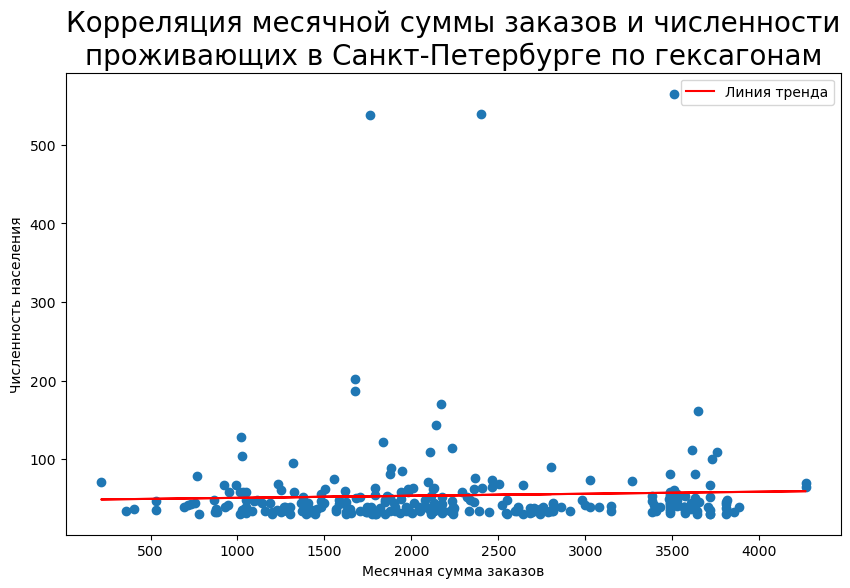

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
z = np.polyfit (x, y, 1)
p = np.poly1d (z)
plt.plot(x, p(x), color='red', label='Линия тренда')

# Добавление подписей
plt.xlabel('Месячная сумма заказов')
plt.ylabel('Численность населения')
plt.title('Корреляция месячной суммы заказов и численности\nпроживающих в Санкт-Петербурге по гексагонам', fontsize=20)

# Отображение легенды
plt.legend()

# Отображение графика
plt.show()

In [35]:
import ydata_profiling

In [40]:
gdf['distance'].quantile()

1587.1034999999997

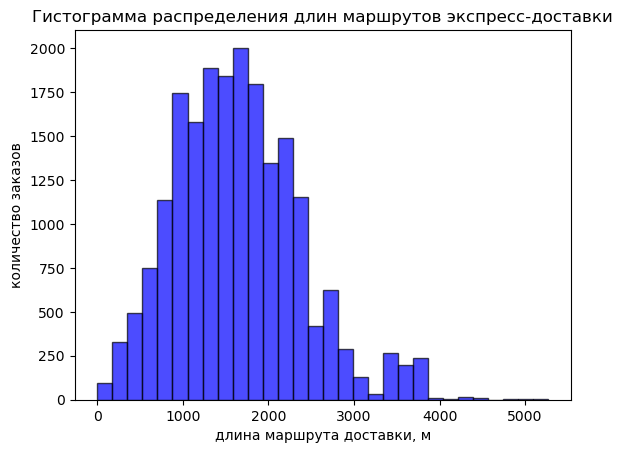

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Генерация случайных данных
data = gdf['distance']

# Построение гистограммы
plt.hist(data, bins=30, alpha=0.7, color='blue', edgecolor='black')

# Добавление заголовков и подписей к осям
plt.title('Гистограмма распределения длин маршрутов экспресс-доставки')
plt.xlabel('длина маршрута доставки, м')
plt.ylabel('количество заказов')

# Отображение графика
plt.show()
